In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from utils.file_utilities import s3_download

In [3]:
# path = "CRSP/crsp_2018-2023_clean_3.parquet"
# file_path = s3_download(path)
file_path = "/home/rcao/repos/capstone/data/crsp_2018-2023_clean_3.parquet"

In [5]:
df = pd.read_parquet(file_path)

In [10]:
df.dtypes

date                              datetime64[ns]
permno_id                                 object
ncusip_id                                 object
cusip_id                                  object
ticker                                    object
share_code                                object
share_code_type                           object
share_code_detail                         object
exchange_code                             object
company_name                              object
primary_exchange                          object
trading_status                            object
security_status                           object
naics                                     object
naics_sector                              object
naics_secondary                           object
ask_or_high_price                        float64
ask_price                                float64
bid_or_low_price                         float64
bid_price                                float64
open_price          

In [7]:
df.head()

,date,permno_id,ncusip_id,cusip_id,ticker,share_code,share_code_type,share_code_detail,exchange_code,company_name,...,return_14,log_return_14,abs_log_return_14,price_28,return_28,log_return_28,abs_log_return_28,volatility_7,volatility_14,volatility_28
9263,2018-01-02,10104,68389X10,68389X10,ORCL,11.0,1,1,1,ORACLE CORP,...,1.733219,1.005480,1.005480,48.15,0.293373,0.257254,0.257254,0.136136,0.109282,0.276310
9264,2018-01-03,10104,68389X10,68389X10,ORCL,11.0,1,1,1,ORACLE CORP,...,1.411025,0.880052,0.880052,48.49,0.147139,0.137271,0.137271,0.091648,0.081082,0.268724
9265,2018-01-04,10104,68389X10,68389X10,ORCL,11.0,1,1,1,ORACLE CORP,...,1.277709,0.823170,0.823170,49.45,0.237235,0.212879,0.212879,0.089939,0.079524,0.273385
9266,2018-01-05,10104,68389X10,68389X10,ORCL,11.0,1,1,1,ORACLE CORP,...,1.589437,0.951440,0.951440,50.64,0.402930,0.338563,0.338563,0.105015,0.107098,0.281463
9267,2018-01-08,10104,68389X10,68389X10,ORCL,11.0,1,1,1,ORACLE CORP,...,1.087791,0.736107,0.736107,50.71,0.317885,0.276028,0.276028,0.105560,0.139328,0.280139


In [26]:
# Convert the Series to a DataFrame and reset the index
df_grouped = df.groupby("permno_id").size().sort_values(ascending=False).reset_index(name="counts")

# Now, 'permno_id' and 'counts' are columns in df_grouped
fig = px.histogram(df_grouped, x="counts", nbins=5)  # Adjust nbins as needed for bin size
fig.update_layout(title="Histogram of Counts", xaxis_title="Counts", yaxis_title="Frequency")
fig.show()

df_grouped["counts"].describe()

count     554.000000
mean     1461.882671
std       192.887582
min       205.000000
25%      1509.000000
50%      1509.000000
75%      1509.000000
max      1509.000000
Name: counts, dtype: float64

In [27]:
df_grouped["counts"] == 1509

0       True
1       True
2       True
3       True
4       True
       ...  
549    False
550    False
551    False
552    False
553    False
Name: counts, Length: 554, dtype: bool

In [32]:
df_filtered = df[df["permno_id"].isin(df_grouped[df_grouped["counts"] == 1509]["permno_id"])]
df_filtered

,date,permno_id,ncusip_id,cusip_id,ticker,share_code,share_code_type,share_code_detail,exchange_code,company_name,...,return_14,log_return_14,abs_log_return_14,price_28,return_28,log_return_28,abs_log_return_28,volatility_7,volatility_14,volatility_28
9263,2018-01-02,10104,68389X10,68389X10,ORCL,11.0,1,1,1,ORACLE CORP,...,1.733219,1.005480,1.005480,48.15,0.293373,0.257254,0.257254,0.136136,0.109282,0.276310
9264,2018-01-03,10104,68389X10,68389X10,ORCL,11.0,1,1,1,ORACLE CORP,...,1.411025,0.880052,0.880052,48.49,0.147139,0.137271,0.137271,0.091648,0.081082,0.268724
9265,2018-01-04,10104,68389X10,68389X10,ORCL,11.0,1,1,1,ORACLE CORP,...,1.277709,0.823170,0.823170,49.45,0.237235,0.212879,0.212879,0.089939,0.079524,0.273385
9266,2018-01-05,10104,68389X10,68389X10,ORCL,11.0,1,1,1,ORACLE CORP,...,1.589437,0.951440,0.951440,50.64,0.402930,0.338563,0.338563,0.105015,0.107098,0.281463
9267,2018-01-08,10104,68389X10,68389X10,ORCL,11.0,1,1,1,ORACLE CORP,...,1.087791,0.736107,0.736107,50.71,0.317885,0.276028,0.276028,0.105560,0.139328,0.280139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658917,2023-12-22,93436,88160R10,88160R10,TSLA,11.0,1,1,3,TESLA INC,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7658918,2023-12-26,93436,88160R10,88160R10,TSLA,11.0,1,1,3,TESLA INC,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7658919,2023-12-27,93436,88160R10,88160R10,TSLA,11.0,1,1,3,TESLA INC,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7658920,2023-12-28,93436,88160R10,88160R10,TSLA,11.0,1,1,3,TESLA INC,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [93]:
df[df["permno_id"] == "50876"]

,date,permno_id,ncusip_id,cusip_id,ticker,share_code,share_code_type,share_code_detail,exchange_code,company_name,...,return_14,log_return_14,abs_log_return_14,price_28,return_28,log_return_28,abs_log_return_28,volatility_7,volatility_14,volatility_28
4451773,2018-01-02,50876,53245710,53245710,LLY,11.0,1,1,1,LILLY ELI & CO,...,-0.055267,-0.056853,0.056853,76.25,-0.895961,-2.262992,2.262992,0.086743,0.136557,0.294534
4451774,2018-01-03,50876,53245710,53245710,LLY,11.0,1,1,1,LILLY ELI & CO,...,-0.177590,-0.195516,0.195516,76.21,-0.943975,-2.881951,2.881951,0.088842,0.134146,0.293346
4451775,2018-01-04,50876,53245710,53245710,LLY,11.0,1,1,1,LILLY ELI & CO,...,-0.107343,-0.113553,0.113553,77.03,-0.893475,-2.239378,2.239378,0.161025,0.138061,0.299703
4451776,2018-01-05,50876,53245710,53245710,LLY,11.0,1,1,1,LILLY ELI & CO,...,0.106041,0.100787,0.100787,78.02,-0.888876,-2.197109,2.197109,0.156361,0.165516,0.299984
4451777,2018-01-08,50876,53245710,53245710,LLY,11.0,1,1,1,LILLY ELI & CO,...,0.307210,0.267895,0.267895,78.97,-0.748171,-1.379006,1.379006,0.155717,0.165017,0.303522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453277,2023-12-22,50876,53245710,53245710,LLY,11.0,1,1,1,LILLY ELI & CO,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4453278,2023-12-26,50876,53245710,53245710,LLY,11.0,1,1,1,LILLY ELI & CO,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4453279,2023-12-27,50876,53245710,53245710,LLY,11.0,1,1,1,LILLY ELI & CO,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4453280,2023-12-28,50876,53245710,53245710,LLY,11.0,1,1,1,LILLY ELI & CO,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
df_pivot = df_filtered.pivot(index="date", columns="permno_id", values="return")
df_pivot.head()

permno_id,10104,10107,10138,10145,10516,10696,11308,11403,11404,11600,...,92611,92614,92655,93002,93089,93096,93132,93246,93429,93436
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,-0.013748,0.004793,-0.017631,0.002282,0.000249,-0.005948,-0.007411,0.005500,-0.016127,0.019900,...,0.004298,-0.026342,0.003175,0.039354,-0.001771,0.011289,0.015106,-0.030089,-0.014768,0.029484
2018-01-03,0.023161,0.004654,0.013679,-0.008262,-0.007733,0.008132,-0.002196,0.020927,-0.009452,-0.003426,...,0.009955,-0.007072,0.010490,0.010936,-0.002922,-0.000744,0.015333,0.035395,0.006599,-0.010233
2018-01-04,0.009851,0.008801,0.007848,0.013513,0.016843,0.014078,0.014085,0.015141,-0.011716,-0.000149,...,0.003718,-0.009497,0.004340,0.000333,0.005024,0.011703,-0.022874,0.006837,0.003885,-0.008290
2018-01-05,0.006019,0.012398,0.018232,0.006990,-0.006675,0.009906,-0.000217,0.009408,-0.000978,0.014051,...,0.023949,-0.009816,0.019069,0.005926,0.008851,0.006625,0.002273,0.006790,0.028700,0.006230
2018-01-08,0.010522,0.001020,0.024713,-0.005399,-0.002240,0.002006,-0.001519,0.021141,0.014069,0.006781,...,0.004038,0.008646,-0.017357,0.002393,0.001239,-0.013686,0.020408,-0.017457,0.015125,0.062638


In [36]:
df_pivot.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='date', length=1509, freq=None)

In [37]:
date_cutoff = pd.Timestamp("2023-10-01")

In [38]:
train = df_pivot[:date_cutoff]
train_span = len(train)
train_span

1446

In [39]:
test = df_pivot[date_cutoff:]
test_span = len(test)
test_span

63

In [40]:
train.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-09-18', '2023-09-19', '2023-09-20', '2023-09-21',
               '2023-09-22', '2023-09-25', '2023-09-26', '2023-09-27',
               '2023-09-28', '2023-09-29'],
              dtype='datetime64[ns]', name='date', length=1446, freq=None)

Reference: https://github.com/zhuodannychen/Portfolio-Optimization


In [41]:
from pypfopt import expected_returns, risk_models
from pypfopt.cla import CLA
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import ema_historical_return
from pypfopt.risk_models import exp_cov

mu = expected_returns.ema_historical_return(train, returns_data=True, span=train_span)
Sigma = risk_models.exp_cov(train, returns_data=True, span=train_span)
risk_free_rate = 0.04  # average of 10Y treasury in 2023

**The covariance matrix is not positive definite because it is singular. That means that at least one of your variables can be expressed as a linear combination of the others. You do not need all the variables as the value of at least one can be determined from a subset of the others. I would suggest adding variables sequentially and checking the covariance matrix at each step. If a new variable creates a singularity drop it and go on the the next one. Eventually you should have a subset of variables with a postive definite covariance matrix.**


In [45]:
ret_ef = np.arange(0, max(mu), 0.01)
vol_ef = []
for i in ret_ef:
    ef = EfficientFrontier(mu, Sigma)
    ef.efficient_return(i)
    vol_ef.append(ef.portfolio_performance()[1])

ef = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp = ef.min_volatility()
min_vol_ret = ef.portfolio_performance(risk_free_rate=risk_free_rate)[0]
min_vol_vol = ef.portfolio_performance(risk_free_rate=risk_free_rate)[1]

ef_sharp = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_sharp.max_sharpe(risk_free_rate=risk_free_rate)
max_sharpe_ret = ef_sharp.portfolio_performance(risk_free_rate=risk_free_rate)[0]
max_sharpe_vol = ef_sharp.portfolio_performance(risk_free_rate=risk_free_rate)[1]

/home/rcao/.cache/pypoetry/virtualenvs/src-_08Hpw27-py3.10/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning:

Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.



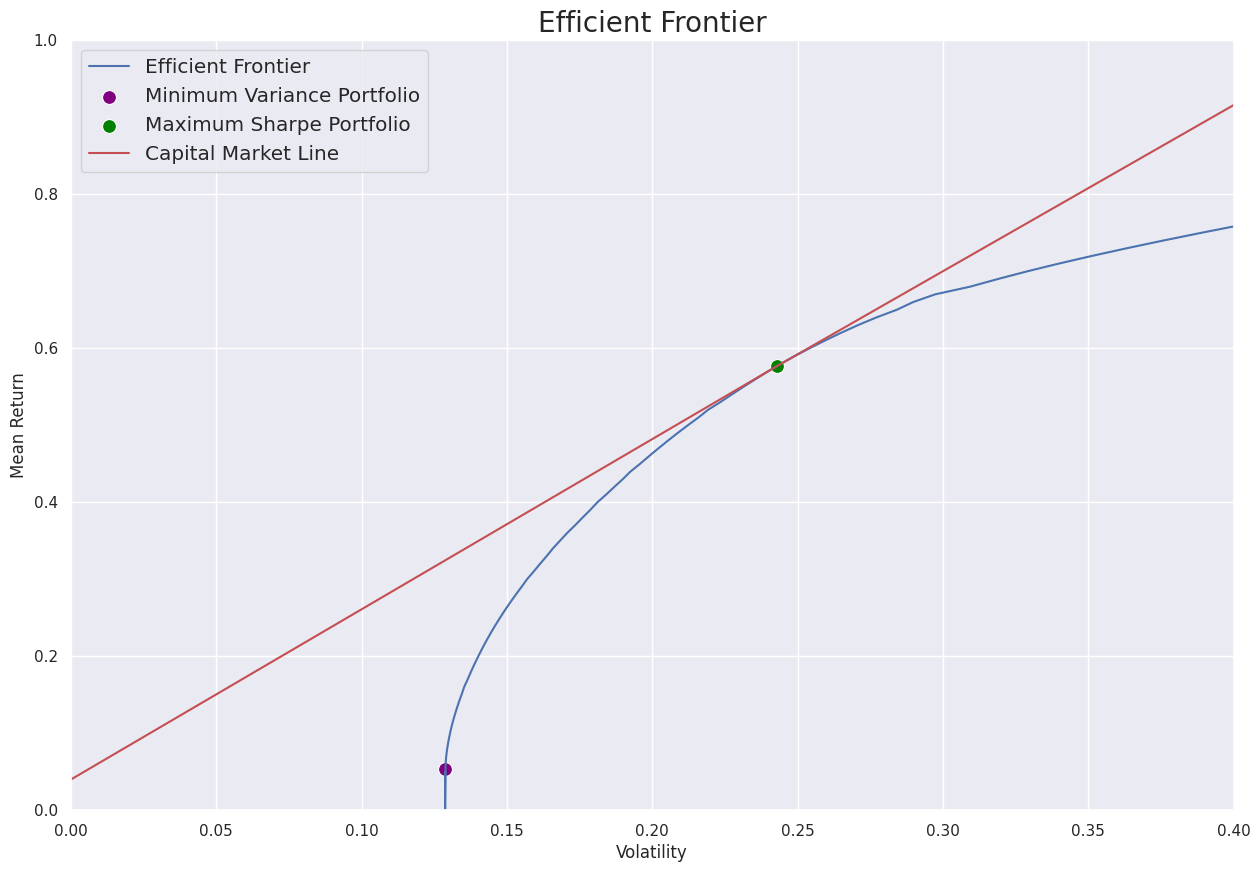

In [91]:
# plot the data
sns.set()

fig, ax = plt.subplots(figsize=[15, 10])

sns.lineplot(x=vol_ef, y=ret_ef, label="Efficient Frontier", ax=ax)
sns.scatterplot(
    x=[min_vol_vol],
    y=[min_vol_ret],
    ax=ax,
    label="Minimum Variance Portfolio",
    color="purple",
    s=100,
)
sns.scatterplot(
    x=[max_sharpe_vol],
    y=[max_sharpe_ret],
    ax=ax,
    label="Maximum Sharpe Portfolio",
    color="green",
    s=100,
)
sns.lineplot(
    x=[0, max_sharpe_vol, 1],
    y=[risk_free_rate, max_sharpe_ret, (float(max_sharpe_ret) - risk_free_rate) / max_sharpe_vol],
    label="Capital Market Line",
    ax=ax,
    color="r",
)

ax.set(xlim=[0, 0.4])
ax.set(ylim=[0, 1])
ax.set_xlabel("Volatility")
ax.set_ylabel("Mean Return")
plt.legend(fontsize="large")
plt.title("Efficient Frontier", fontsize="20")

ax.figure.savefig("EffFront_big.png", dpi=300)

In [47]:
ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)

Expected annual return: 5.3%
Annual volatility: 12.9%
Sharpe Ratio: 0.10


(0.05317668064614239, 0.12872746293689866, 0.10236106845826291)

In [48]:
rounded_weights_minvar = [(k, round(v, 4)) for (k, v) in raw_weights_minvar_exp.items() if round(v, 4) > 0]
rounded_weights_minvar

[('13168', 0.0001),
 ('13721', 0.0201),
 ('13901', 0.0178),
 ('14338', 0.0296),
 ('16678', 0.0348),
 ('19393', 0.0804),
 ('21178', 0.018),
 ('21207', 0.0365),
 ('22111', 0.0723),
 ('22752', 0.0152),
 ('25320', 0.0145),
 ('26825', 0.0594),
 ('32870', 0.0662),
 ('42585', 0.0421),
 ('43449', 0.0125),
 ('46578', 0.0237),
 ('55976', 0.0557),
 ('65875', 0.113),
 ('75607', 0.0216),
 ('75828', 0.0449),
 ('77730', 0.0078),
 ('79906', 0.0049),
 ('82307', 0.0085),
 ('83639', 0.0462),
 ('84373', 0.0212),
 ('84761', 0.0023),
 ('85459', 0.0195),
 ('90248', 0.0417),
 ('90505', 0.0032),
 ('91068', 0.0117),
 ('91611', 0.0065),
 ('93429', 0.0511)]

In [49]:
raw_weights_maxsharpe_exp
ef_sharp.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)

Expected annual return: 57.7%
Annual volatility: 24.3%
Sharpe Ratio: 2.21


(0.576742739588948, 0.24286838549859463, 2.210014854288451)

In [50]:
rounded_weights_maxsharpe = [(k, round(v, 4)) for (k, v) in raw_weights_maxsharpe_exp.items() if round(v, 4) > 0]
rounded_weights_maxsharpe

[('12872', 0.0919),
 ('13323', 0.005),
 ('16309', 0.0231),
 ('24328', 0.0048),
 ('50876', 0.4809),
 ('81061', 0.1058),
 ('85792', 0.0758),
 ('86580', 0.1509),
 ('93436', 0.0619)]

### BackTesting


In [52]:
import yfinance as yf

# Create a list of symbols
symbols = ["SPY"]
# Create data frame
index_data = yf.download(tickers=" ".join(symbols), start="2018-01-02", end="2024-05-31")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [53]:
index_data.describe()

<bound method NDFrame.describe of Date
2018-01-02    241.540131
2018-01-03    243.067947
2018-01-04    244.092468
2018-01-05    245.719009
2018-01-08    246.168381
                 ...    
2023-12-22    470.664490
2023-12-26    472.651886
2023-12-27    473.506470
2023-12-28    473.685333
2023-12-29    472.314026
Name: Adj Close, Length: 1509, dtype: float64>

In [54]:
index = pd.DataFrame(index_data)
index = index.rename(columns={"Adj Close": "SnP500"})
index.describe()
# index.index

<bound method NDFrame.describe of                 SnP500
Date                  
2018-01-02  241.540131
2018-01-03  243.067947
2018-01-04  244.092468
2018-01-05  245.719009
2018-01-08  246.168381
...                ...
2023-12-22  470.664490
2023-12-26  472.651886
2023-12-27  473.506470
2023-12-28  473.685333
2023-12-29  472.314026

[1509 rows x 1 columns]>

In [57]:
weights_minvar_exp = list(raw_weights_minvar_exp.values())
weights_maxsharpe_exp = list(raw_weights_maxsharpe_exp.values())

ret_1 = train.dot(weights_minvar_exp).add(1).cumprod().subtract(1).multiply(100)
ret_2 = train.dot(weights_maxsharpe_exp).add(1).cumprod().subtract(1).multiply(100)

ind_ret = index[:date_cutoff].pct_change().add(1).cumprod().subtract(1).multiply(100)

In [58]:
back = pd.DataFrame({"MinVar": ret_1, "MaxSharpe": ret_2})
back = pd.concat([back, ind_ret], join="outer", axis=1)
back.drop(back.tail(1).index, inplace=True)

back.interpolate(method="linear", inplace=True)

fig = px.line(back, x=back.index, y=back.columns, title="Training Portfolio Performance (2018 Jan - 2023 Sep)")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Cumulative Return in %")

fig.show()

In [59]:
weights_minvar_exp = list(raw_weights_minvar_exp.values())
weights_maxsharpe_exp = list(raw_weights_maxsharpe_exp.values())

ret_1 = test.dot(weights_minvar_exp).add(1).cumprod().subtract(1).multiply(100)
ret_2 = test.dot(weights_maxsharpe_exp).add(1).cumprod().subtract(1).multiply(100)
ind_ret = index[date_cutoff:].pct_change().add(1).cumprod().subtract(1).multiply(100)

In [60]:
back = pd.DataFrame({"MinVar": ret_1, "MaxSharpe": ret_2})
back = pd.concat([back, ind_ret], join="outer", axis=1)
back.drop(back.tail(1).index, inplace=True)

back.interpolate(method="linear", inplace=True)

fig = px.line(back, x=back.index, y=back.columns, title="Testing Portfolio Performance (2023 Oct-Dec)")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Cumulative Return in %")

fig.show()

In [1]:
# this part should be updated -> to use the daily returns instead of cumulative
# ind_ret_series = ind_ret["SnP500"]
# summary = back.loc[[back.index.max()]]

# summary["category"] = ["Realized return"]
# summary.set_index("category", inplace=True)

# summary.loc["volatility"] = [ret_1.std(), ret_2.std(), ind_ret_series.std()]
# summary.loc["sharpe ratio"] = [
#     (ret_1.mean() - risk_free_rate) / ret_1.std(),
#     (ret_2.mean() - risk_free_rate) / ret_2.std(),
#     (ind_ret_series.mean() - risk_free_rate) / ind_ret_series.std(),
# ]
# summary = summary.round(3)

# summary